# Time-Series Data Project, Team 1
### Dataset: South Koeran Pollution
- 국내 위치별 일일 대기오염 수치(미세먼지, 오존 등)와 날씨 데이터(기온, 기압 등) 제공
- 대기오염 데이터와 날씨 데이터가 각각 제공
### Target
- 서울시 미세먼지 데이터(pm 2.5) 수치 예측

### Metric
- MSE, PMSE, R2-Score 등
- 프로젝트 진행하면서 구체화 될 예정

### Source
- 캐글에서 다운로드 (https://www.kaggle.com/datasets/calebreigada/south-korean-pollution)
    - pollution data: https://www.airkorea.or.kr/
    - weather data: https://www.ncei.noaa.gov/


In [66]:
import pandas as pd

In [67]:
pollution = pd.read_csv("/home/dataset/south-korean-pollution-data.csv")
weather = pd.read_csv("/home/dataset/south_korean_weather.csv")

In [68]:
pollution['date'] = pd.to_datetime(pollution['date'], infer_datetime_format=True)
weather['DATE'] = pd.to_datetime(weather['DATE'], infer_datetime_format=True)

/tmp/ipykernel_106292/81431856.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  pollution['date'] = pd.to_datetime(pollution['date'], infer_datetime_format=True)
/tmp/ipykernel_106292/81431856.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather['DATE'] = pd.to_datetime(weather['DATE'], infer_datetime_format=True)


In [69]:
pollution.head()

,Unnamed: 0,date,pm25,pm10,o3,no2,so2,co,Lat,Long,City,District,Country
0,0,2022-02-01,112,31,35,2,1,4,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea
1,1,2022-02-02,92,21,35,2,1,0,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea
2,2,2022-02-03,60,20,35,1,1,4,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea
3,3,2022-02-04,51,27,33,1,1,4,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea
4,4,2022-02-05,57,24,27,2,1,5,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea


In [70]:
weather.head()

,Unnamed: 0,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,LIQUID_PRECIPITATION,SNOW_DEPTH,DEW,EXTREME_AIR_TEMP,ATMOSPHERIC_PRESSURE,SEA_LEVEL_PRESSURE,TEMP,VIS,WND
0,0,47112099999,"INCHEON, KS",37.466667,126.633333,70.0,2014-01-01 00:00:00,"12,0001,3,1",NaN,"+0005,1","120,N,+0024,1","99999,0,10054,1","10138,1","+0044,1","012000,1,9,9","270,1,N,0062,1"
1,1,47112099999,"INCHEON, KS",37.466667,126.633333,70.0,2014-01-01 06:00:00,NaN,NaN,"+0003,1",NaN,"99999,0,10046,1","10129,1","+0072,1","015000,1,9,9","270,1,N,0072,1"
2,2,47112099999,"INCHEON, KS",37.466667,126.633333,70.0,2014-01-01 09:00:00,NaN,NaN,"+0031,1",NaN,"99999,0,10051,1","10135,1","+0065,1","011000,1,9,9","270,1,N,0062,1"
3,3,47112099999,"INCHEON, KS",37.466667,126.633333,70.0,2014-01-01 12:00:00,"12,0000,2,1",NaN,"+0003,1","240,M,+0074,1","99999,0,10071,1","10155,1","+0058,1","008000,1,9,9","320,1,N,0051,1"
4,4,47112099999,"INCHEON, KS",37.466667,126.633333,70.0,2014-01-01 15:00:00,NaN,NaN,"-0031,1",NaN,"99999,0,10099,1","10184,1","+0030,1","013000,1,9,9","340,1,N,0051,1"


In [71]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160046 entries, 0 to 160045
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            160046 non-null  int64         
 1   STATION               160046 non-null  int64         
 2   NAME                  160046 non-null  object        
 3   LATITUDE              160046 non-null  float64       
 4   LONGITUDE             160046 non-null  float64       
 5   ELEVATION             160046 non-null  float64       
 6   DATE                  160046 non-null  datetime64[ns]
 7   LIQUID_PRECIPITATION  30106 non-null   object        
 8   SNOW_DEPTH            360 non-null     object        
 9   DEW                   160046 non-null  object        
 10  EXTREME_AIR_TEMP      24045 non-null   object        
 11  ATMOSPHERIC_PRESSURE  160019 non-null  object        
 12  SEA_LEVEL_PRESSURE    160046 non-null  object        
 13 

### 중간 정리
- 각 데이터셋이 위도/경도 정보를 포함하고 있음
    - 위도, 경도를 기준으로 통합 가능성 확인

- 오염수치는 일일 기준, 날씨 데이터는 시간 기준으로 수집
    - 모두 일일 기준으로 통합 필요

### 서울 데이터셋 수집
- 각 데이터의 위도, 경도 및 도시 정보를 기반으로 동일한 서울 데이터셋 수집

In [77]:
print(weather[weather.NAME == "SEOUL CITY, KS"].LATITUDE.value_counts())
print(weather[weather.NAME == "SEOUL CITY, KS"].LONGITUDE.value_counts())

LATITUDE
37.566667    26689
Name: count, dtype: int64
LONGITUDE
126.966667    26689
Name: count, dtype: int64


In [78]:
pollution[pollution.District=="Seoul"].City.value_counts()


City
Nowon-Gu     2891
Gwanak-Gu    2880
Name: count, dtype: int64

In [81]:
print(pollution[pollution.District=="Seoul"][pollution.City=="Nowon-Gu"].Lat.value_counts())
print(pollution[pollution.District=="Seoul"][pollution.City=="Nowon-Gu"].Long.value_counts())

Lat
37.6542    2891
Name: count, dtype: int64
Long
127.0568    2891
Name: count, dtype: int64


/tmp/ipykernel_106292/2061471348.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(pollution[pollution.District=="Seoul"][pollution.City=="Nowon-Gu"].Lat.value_counts())
/tmp/ipykernel_106292/2061471348.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(pollution[pollution.District=="Seoul"][pollution.City=="Nowon-Gu"].Long.value_counts())


In [83]:
print(pollution[pollution.District=="Seoul"][pollution.City=="Gwanak-Gu"].Lat.value_counts())
print(pollution[pollution.District=="Seoul"][pollution.City=="Gwanak-Gu"].Long.value_counts())

Lat
37.4784    2880
Name: count, dtype: int64
Long
126.9516    2880
Name: count, dtype: int64


/tmp/ipykernel_106292/2278542405.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(pollution[pollution.District=="Seoul"][pollution.City=="Gwanak-Gu"].Lat.value_counts())
/tmp/ipykernel_106292/2278542405.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(pollution[pollution.District=="Seoul"][pollution.City=="Gwanak-Gu"].Long.value_counts())


In [84]:
weather_seoul = weather[weather["NAME"]=="SEOUL CITY, KS"]
pollution_seoul = pollution[pollution.District=="Seoul"][pollution.City=="Gwanak-Gu"]

/tmp/ipykernel_106292/121752064.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pollution_seoul = pollution[pollution.District=="Seoul"][pollution.City=="Gwanak-Gu"]


In [64]:
pollution_seoul.sort_values("date", inplace=True)
pollution_seoul.drop("Unnamed: 0", axis=1, inplace=True)

weather_seoul.sort_values("DATE", inplace=True)
weather_seoul.drop("Unnamed: 0", axis=1, inplace=True)

In [69]:
weather_seoul.to_csv("/home/dataset/weather_seoul.csv", index=False)
pollution_seoul.to_csv("/home/dataset/pollution_seoul.csv", index=False)

## 서울 시내 측정소 위치 확인
- 날씨 데이터와 대기오염 데이터의 측정 위치 간 차이가 있음을 확인(약 10km)
- 날씨 데이터의 컬럼이 이해하기 어려운 데이터가 다소 있음

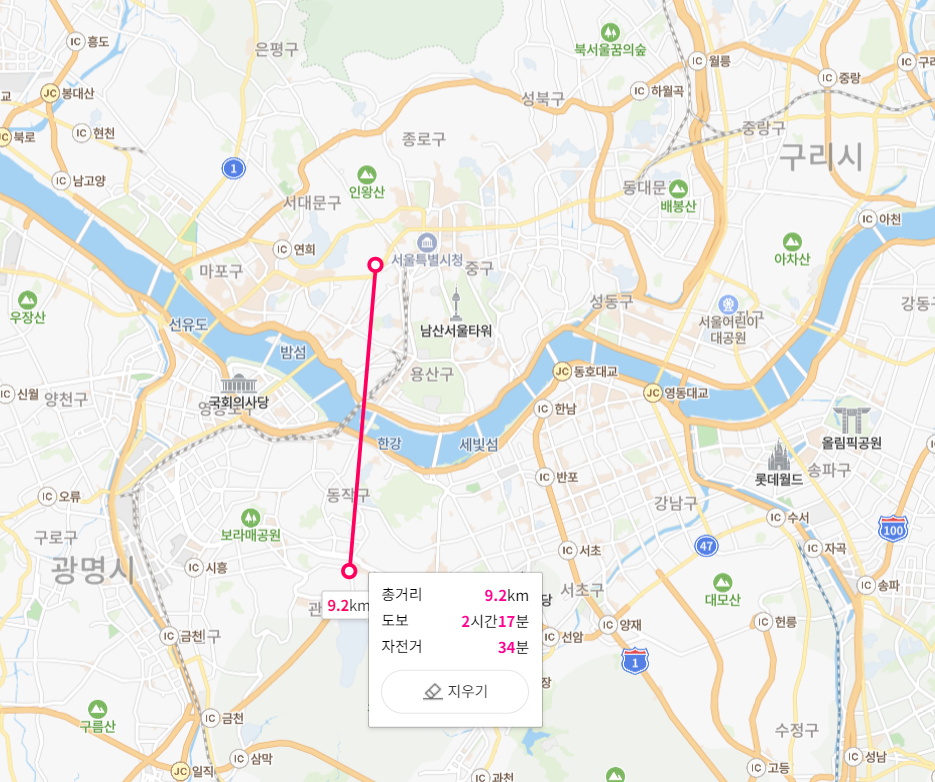

## 추가 데이터셋 수집
- 좀 더 이해하기 쉬운 국내 출처 날씨 데이터 탐색
    - 국내 출처 날씨 데이터셋 수집 가능함을 확인
    - Source: https://data.kma.go.kr/cmmn/main.do

- 날씨 데이터와 동일한 위치의 대기오염 관측 데이터 수집
    - 날씨 데이터 관측소와 매우 가까운 관측 데이터 수집 가능함을 확인
    - Source: https://www.airkorea.or.kr/web/

- 각 소스로부터, 추가 데이터셋 수집 및 확인

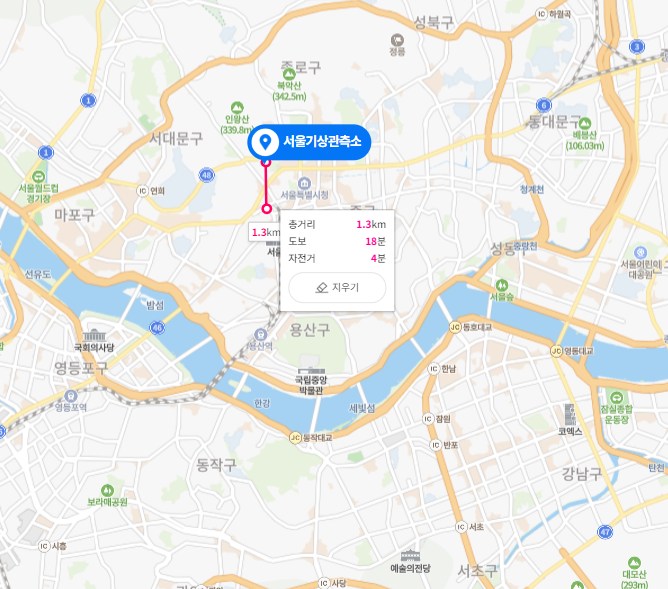

In [85]:
weather = pd.read_csv("/home/dataset/seoul_weather.csv" , encoding='cp949')

In [87]:
weather.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),일강수량(mm),...,일 최심신적설 시각(hhmi),일 최심적설(cm),일 최심적설 시각(hhmi),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),최저 초상온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm)
0,108,서울,2014-01-01,4.0,0.3,723.0,7.9,1535.0,0.03,0.0,...,NaN,NaN,NaN,2.1,1.9,0.8,-4.3,NaN,1.8,0.0
1,108,서울,2014-01-02,1.5,-1.3,724.0,6.2,1507.0,NaN,NaN,...,NaN,NaN,NaN,0.3,0.0,0.0,-5.4,NaN,2.0,NaN
2,108,서울,2014-01-03,2.3,-1.1,635.0,7.3,1338.0,NaN,NaN,...,NaN,NaN,NaN,4.6,2.0,0.1,-5.1,NaN,1.4,NaN
3,108,서울,2014-01-04,-0.1,-3.7,722.0,5.6,1344.0,NaN,NaN,...,NaN,NaN,NaN,0.9,0.5,-0.2,-6.4,NaN,1.9,NaN
4,108,서울,2014-01-05,-0.8,-4.3,810.0,3.8,1418.0,NaN,NaN,...,NaN,NaN,NaN,2.1,1.9,-0.7,-7.0,NaN,1.7,NaN


In [86]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   지점                 3652 non-null   int64  
 1   지점명                3652 non-null   object 
 2   일시                 3652 non-null   object 
 3   평균기온(°C)           3652 non-null   float64
 4   최저기온(°C)           3651 non-null   float64
 5   최저기온 시각(hhmi)      3651 non-null   float64
 6   최고기온(°C)           3651 non-null   float64
 7   최고기온 시각(hhmi)      3651 non-null   float64
 8   강수 계속시간(hr)        1422 non-null   float64
 9   일강수량(mm)           1423 non-null   float64
 10  최대 순간 풍속(m/s)      3648 non-null   float64
 11  최대 순간 풍속 풍향(16방위)  3648 non-null   float64
 12  최대 순간풍속 시각(hhmi)   3648 non-null   float64
 13  최대 풍속(m/s)         3648 non-null   float64
 14  최대 풍속 풍향(16방위)     3648 non-null   float64
 15  최대 풍속 시각(hhmi)     3648 non-null   float64
 16  평균 풍속(m/s)         3647 

In [65]:
weather.keys()

Index(['지점', '지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
       '최고기온 시각(hhmi)', '강수 계속시간(hr)', '일강수량(mm)', '최대 순간 풍속(m/s)',
       '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다풍향(16방위)',
       '평균 이슬점온도(°C)', '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)',
       '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최고 해면기압 시각(hhmi)',
       '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
       '합계 일조시간(hr)', '합계 일사량(MJ/m2)', '일 최심신적설(cm)', '일 최심신적설 시각(hhmi)',
       '일 최심적설(cm)', '일 최심적설 시각(hhmi)', '평균 전운량(1/10)', '평균 중하층운량(1/10)',
       '평균 지면온도(°C)', '최저 초상온도(°C)', '합계 대형증발량(mm)', '합계 소형증발량(mm)',
       '9-9강수(mm)'],
      dtype='object')

In [23]:
jongno_pollution = pd.read_csv("/home/dataset/jongno_pollution.csv")

In [25]:
jongno_pollution = jongno_pollution.iloc[1:]

In [26]:
jongno_pollution.info()

,날짜,PM-10,PM-2.5,오존,이산화질소,일산화탄소,아황산가스
1,2018-02-01,36,15,0.011,0.041,0.7,0.004
2,2018-02-02,50,24,0.007,0.053,0.9,0.004
3,2018-02-03,31,12,0.025,0.018,0.5,0.004
4,2018-02-04,27,14,0.029,0.013,0.4,0.003
5,2018-02-05,23,9,0.024,0.019,0.4,0.003
...,...,...,...,...,...,...,...
2025,2023-08-27,28,17,0.0324,0.0151,0.53,0.0033
2026,2023-08-28,16,7,0.019,0.0194,0.51,0.0031
2027,2023-08-29,15,7,0.0153,0.0181,0.49,0.0033
2028,2023-08-30,18,9,0.0151,0.0253,0.64,0.0035


In [27]:
jongno_pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 1 to 2029
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      2029 non-null   object
 1   PM-10   2027 non-null   object
 2   PM-2.5  2026 non-null   object
 3   오존      2027 non-null   object
 4   이산화질소   1978 non-null   object
 5   일산화탄소   2021 non-null   object
 6   아황산가스   2027 non-null   object
dtypes: object(7)
memory usage: 111.1+ KB


In [30]:
jongno_pollution["날짜"] = pd.to_datetime(jongno_pollution["날짜"])

In [37]:
jongno_pollution.rename({"날짜": "Date", "오존": "o3", "이산화질소": "no2", "일산화탄소": "co", "아황산가스": "so2"}, axis=1, inplace=True)


In [39]:
jongno_pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 1 to 2029
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2029 non-null   datetime64[ns]
 1   PM-10   2027 non-null   object        
 2   PM-2.5  2026 non-null   object        
 3   o3      2027 non-null   object        
 4   no2     1978 non-null   object        
 5   co      2021 non-null   object        
 6   so2     2027 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 111.1+ KB


In [51]:
for col in ['PM-10', 'PM-2.5', 'o3', 'no2', 'co', 'so2']:
    jongno_pollution[col] = pd.to_numeric(jongno_pollution[col], errors='coerce')

In [52]:
jongno_pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 1 to 2029
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2029 non-null   datetime64[ns]
 1   PM-10   2027 non-null   float64       
 2   PM-2.5  2026 non-null   float64       
 3   o3      2027 non-null   float64       
 4   no2     1978 non-null   float64       
 5   co      2021 non-null   float64       
 6   so2     2027 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 111.1 KB


In [56]:
# 'Date' 열을 월별 기간으로 변환
jongno_pollution['Month'] = jongno_pollution['Date'].dt.to_period('M')

# 숫자형 데이터가 아닌 컬럼을 숫자형으로 변환 (PM-10, PM-2.5, o3, no2, co, so2)
for col in ['PM-10', 'PM-2.5', 'o3', 'no2', 'co', 'so2']:
    jongno_pollution[col] = pd.to_numeric(jongno_pollution[col], errors='coerce')

# 월별 평균을 계산
monthly_means = jongno_pollution.groupby('Month').mean()

# 누락된 값을 해당 월의 평균값으로 채움
for col in ['PM-10', 'PM-2.5', 'o3', 'no2', 'co', 'so2']:
    jongno_pollution[col] = jongno_pollution.apply(
        lambda row: monthly_means.loc[row['Month'], col] if pd.isnull(row[col]) else row[col],
        axis=1
    )

# 'Month' 열이 더 이상 필요하지 않다면 삭제
jongno_pollution.drop('Month', axis=1, inplace=True)

In [57]:
jongno_pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 1 to 2029
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2029 non-null   datetime64[ns]
 1   PM-10   2029 non-null   float64       
 2   PM-2.5  2029 non-null   float64       
 3   o3      2029 non-null   float64       
 4   no2     1999 non-null   float64       
 5   co      2029 non-null   float64       
 6   so2     2029 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 111.1 KB


In [60]:
jongno_pollution.to_csv("/home/dataset/jongno_pollation_processed.csv", index=False)

### 추가 고려사항
- 기존 데이터셋은 2014~2022년 2월까지의 날씨/대기오염 데이터 제공
    - 각 관측소의 거리가 차이가 있음
- 추가로 수집한 데이터셋은 각 관측소 간 거리가 무시가능한 수준으로 가까움
    - 날씨 데이터셋은 2014~2023년 데이터셋 제공
    - 대기오염 데이터셋은 2018.2 ~ 2023.8 만 존재